In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [6]:
def show_slices(distance_map, graph):
    """Show orthogonal slices through the distance map"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    xx = np.min(distance_map, axis=0)
    yy = np.min(distance_map, axis=1)
    zz = np.min(distance_map, axis=2)
    
    im0 = axes[0].imshow(xx.T, cmap='coolwarm')
    axes[0].set_title('Slice (X)')
    fig.colorbar(im0, ax=axes[0])
    
    im1 = axes[1].imshow(yy.T, cmap='coolwarm')
    axes[1].set_title('Slice (Y)')
    fig.colorbar(im1, ax=axes[1])
    
    im2 = axes[2].imshow(zz.T, cmap='coolwarm')
    axes[2].set_title('Slice (Z)')
    fig.colorbar(im2, ax=axes[2])

    if graph:
        for edge in graph.edges:
            node1, node2 = edge
            x1, y1, z1 = graph.nodes[node1]['pos']
            x2, y2, z2 = graph.nodes[node2]['pos']
            
            axes[0].plot([y1, y2], [z1, z2], 'r-')
            axes[1].plot([x1, x2], [z1, z2], 'r-')
            axes[2].plot([x1, x2], [y1, y2], 'r-')
    
    plt.show()

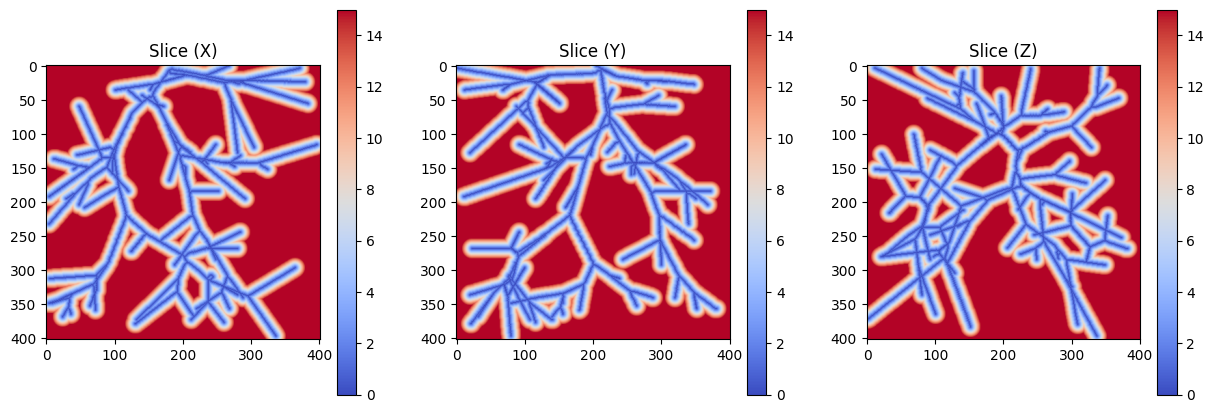

In [13]:
# Load the .npy file
file_path = './preds/val_gt_001.npy'  # Replace 'your_file.npy' with the actual file name
data = np.load(file_path)

# Plot the data
show_slices(data[0], None)

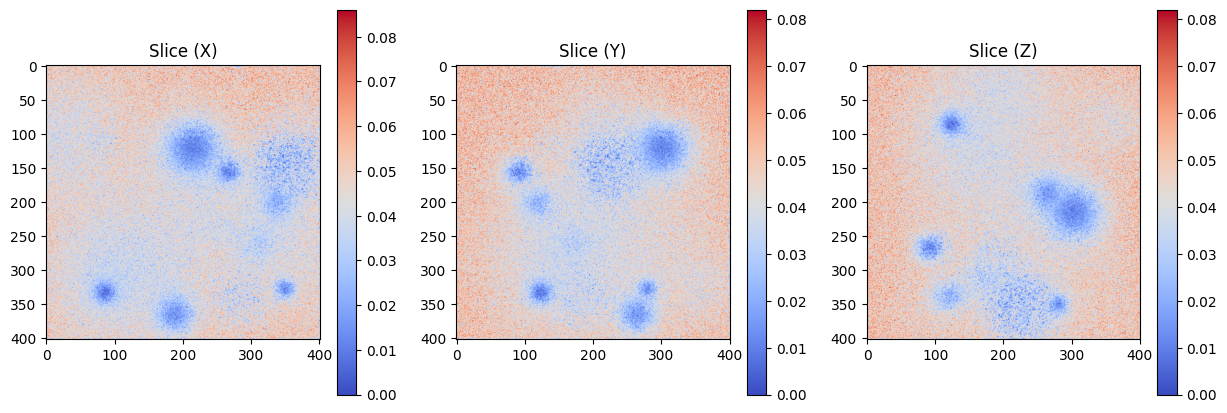

In [12]:
# Load the .npy file
file_path = './preds/val_input_001.npy'  # Replace 'your_file.npy' with the actual file name
data = np.load(file_path)

# Plot the data
show_slices(data[0], None)

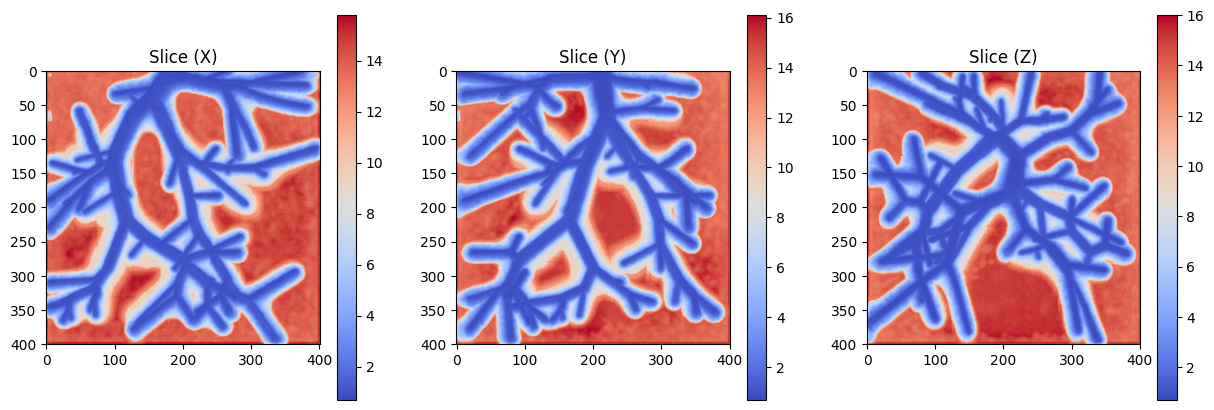

In [9]:
# Load the .npy file
file_path = './preds/val_pred_001_epoch_000050.npy'  # Replace 'your_file.npy' with the actual file name
data = np.load(file_path)

# Plot the data
show_slices(data[0], None)

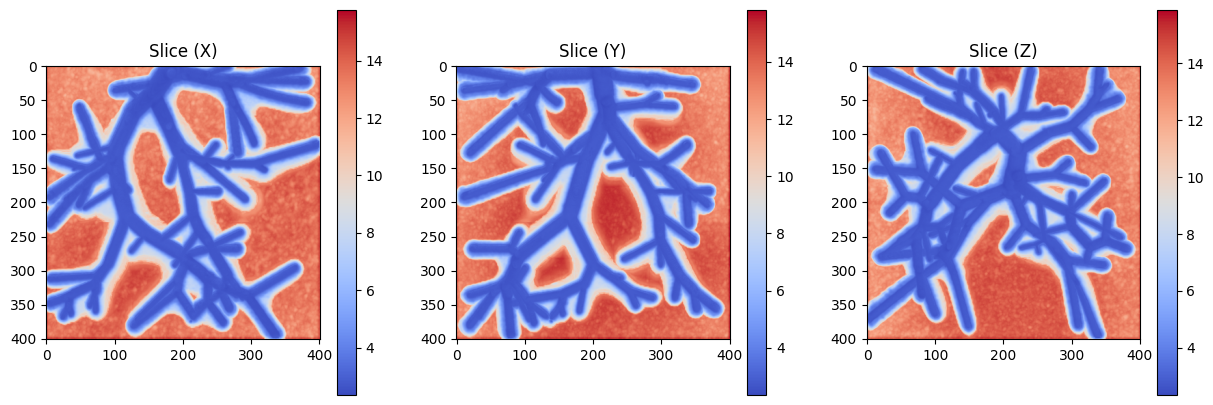

In [10]:
# Load the .npy file
file_path = './preds/val_pred_001_epoch_000100.npy'  # Replace 'your_file.npy' with the actual file name
data = np.load(file_path)

# Plot the data
show_slices(data[0], None)

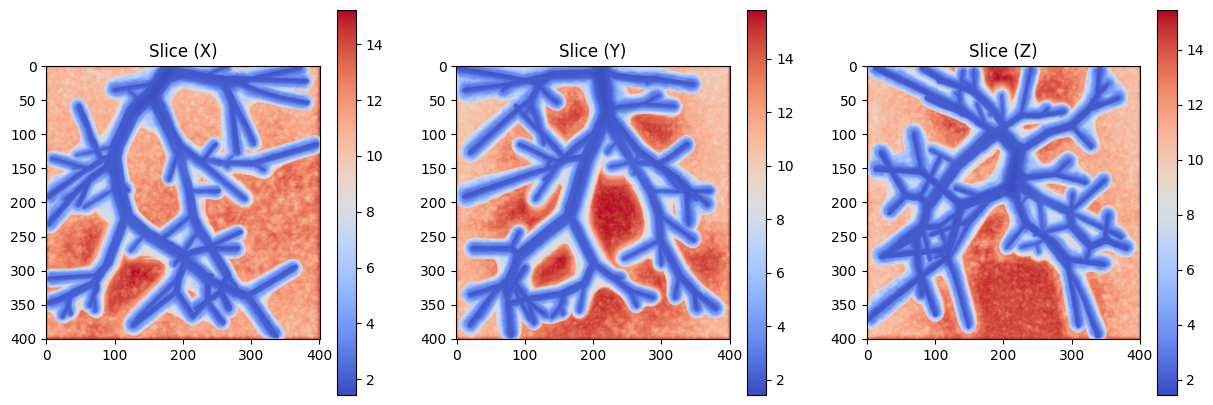

In [11]:
# Load the .npy file
file_path = './preds/val_pred_001_epoch_000150.npy'  # Replace 'your_file.npy' with the actual file name
data = np.load(file_path)

# Plot the data
show_slices(data[0], None)

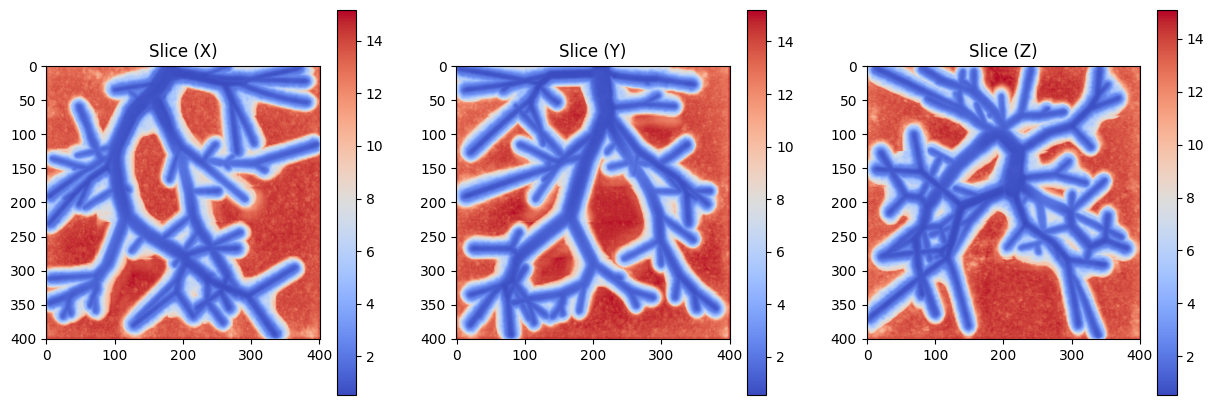

In [15]:
# Load the .npy file
file_path = './preds/val_pred_001_epoch_000200.npy'  # Replace 'your_file.npy' with the actual file name
data = np.load(file_path)

# Plot the data
show_slices(data[0], None)

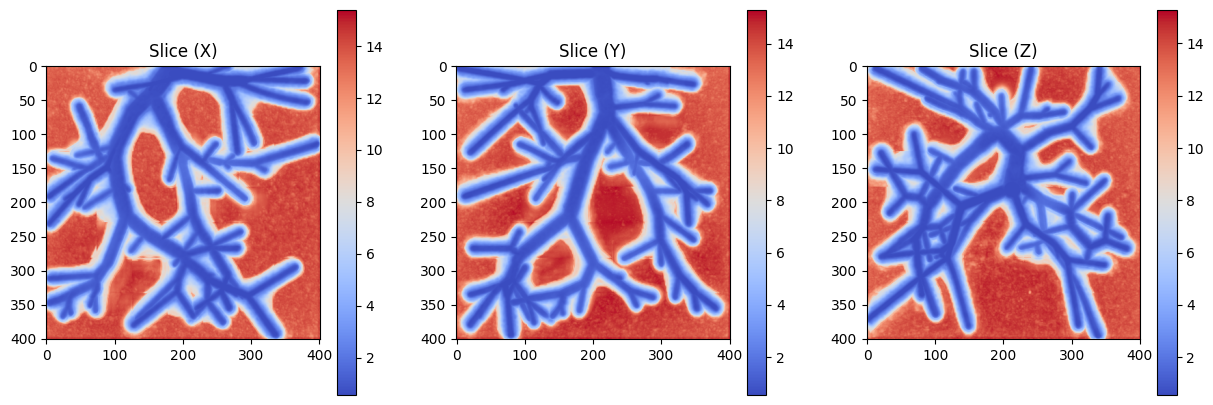

In [17]:
# Load the .npy file
file_path = './preds/val_pred_001_epoch_000250.npy'  # Replace 'your_file.npy' with the actual file name
data = np.load(file_path)

# Plot the data
show_slices(data[0], None)

Found image indices: ['001']
Found epochs: [50, 100, 150, 200, 250]
Processing image 001 with 5 epochs: [50, 100, 150, 200, 250]


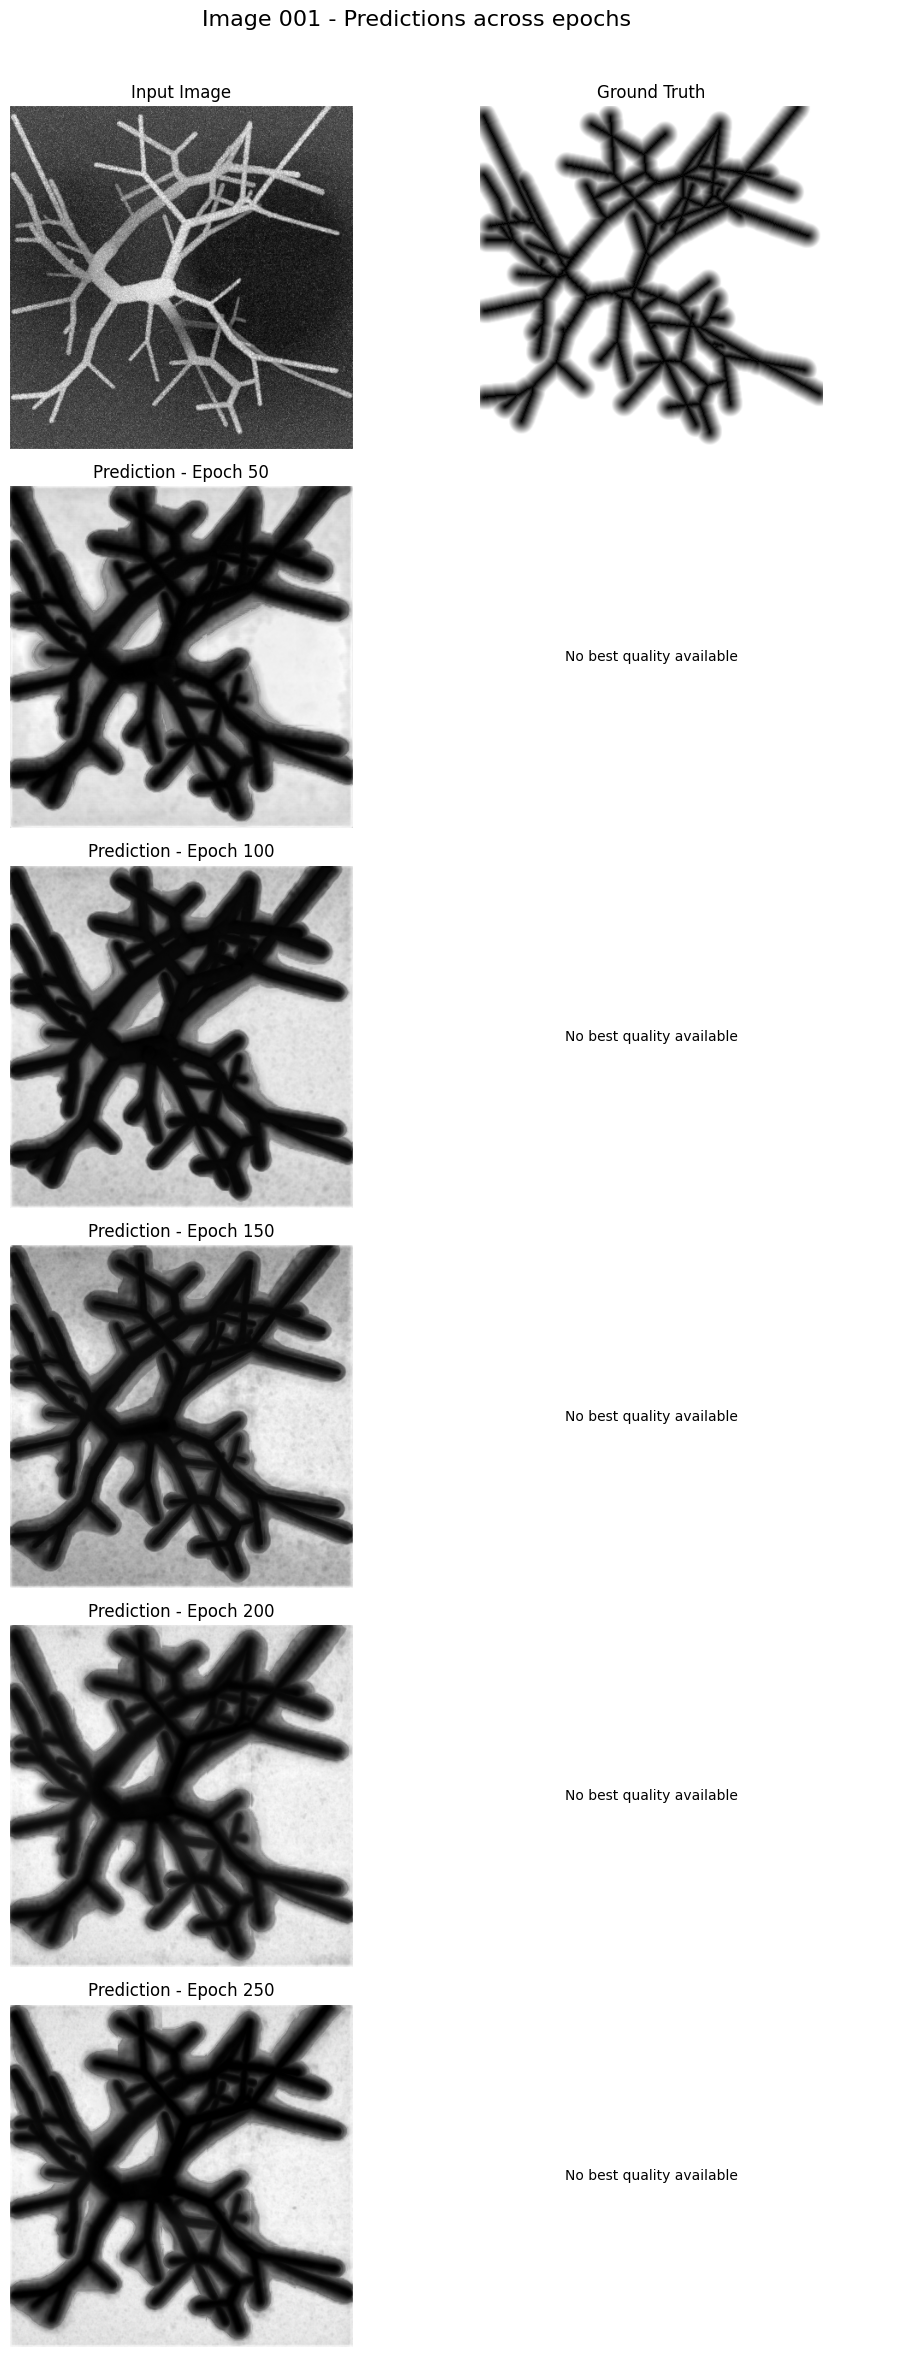

All plots displayed successfully!


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the folder containing the files
output_valid_folder = "./preds"

# List all files in the folder
all_files = sorted([f for f in os.listdir(output_valid_folder) if f.endswith('.npy')])

# Find all input files
input_files = [f for f in all_files if 'val_input_' in f]
image_indices = sorted([f.split('_')[2].split('.')[0] for f in input_files])

# Find all available epochs from the prediction files
pred_files = [f for f in all_files if 'val_pred_' in f and '_epoch_' in f and 'bestqual' not in f]
all_epochs = sorted(set([int(f.split('_epoch_')[1].split('.')[0]) for f in pred_files]))

print(f"Found image indices: {image_indices}")
print(f"Found epochs: {all_epochs}")

# Process each image
for img_idx in image_indices:
    # Find the input and ground truth files
    input_file = f"val_input_{img_idx}.npy"
    gt_file = f"val_gt_{img_idx}.npy"

    # Find prediction files for this image
    img_pred_files = [f for f in pred_files if f.startswith(f"val_pred_{img_idx}_epoch_")]

    # Get the epochs that have predictions for this image
    img_epochs = sorted([int(f.split('_epoch_')[1].split('.')[0]) for f in img_pred_files])

    if not img_epochs:
        print(f"No predictions found for image {img_idx}, skipping.")
        continue

    print(f"Processing image {img_idx} with {len(img_epochs)} epochs: {img_epochs}")

    # Create a figure for this image with 2 columns:
    # Left: Input image and predictions
    # Right: Ground truth and best quality versions
    num_rows = len(img_epochs) + 1  # +1 for input/ground truth
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

    # Handle case with only one epoch (which would make axes 1D)
    if num_rows == 2:
        axes = axes.reshape(2, 2)

    # Set the figure title
    fig.suptitle(f"Image {img_idx} - Predictions across epochs", fontsize=16)

    # Load and plot input and ground truth
    input_path = os.path.join(output_valid_folder, input_file)
    gt_path = os.path.join(output_valid_folder, gt_file)

    # First row: Input and Ground Truth
    if os.path.exists(input_path) and os.path.exists(gt_path):
        # Load data
        input_data = np.load(input_path)
        gt_data = np.load(gt_path)

        # Handle different array shapes
        if input_data.ndim == 3:
            input_proj = np.max(input_data, axis=2)
        elif input_data.ndim == 4 and input_data.shape[0] == 1:
            input_proj = np.max(input_data[0], axis=2)
        else:
            input_proj = input_data

        if gt_data.ndim == 3:
            gt_proj = np.min(gt_data, axis=2)
        elif gt_data.ndim == 4 and gt_data.shape[0] == 1:
            gt_proj = np.min(gt_data[0], axis=2)
        else:
            gt_proj = gt_data

        # Plot input and ground truth
        axes[0, 0].imshow(input_proj, cmap='gray')
        axes[0, 0].set_title(f"Input Image")
        axes[0, 0].axis('off')

        axes[0, 1].imshow(gt_proj, cmap='gray')
        axes[0, 1].set_title(f"Ground Truth")
        axes[0, 1].axis('off')

    # Process each epoch's predictions
    for i, epoch in enumerate(img_epochs):
        row_idx = i + 1  # Start from second row

        # Regular prediction file
        pred_file = f"val_pred_{img_idx}_epoch_{epoch:06d}.npy"
        pred_path = os.path.join(output_valid_folder, pred_file)

        # Best quality file
        bestqual_file = f"val_pred_{img_idx}_bestqual_epoch_{epoch:06d}.npy"
        bestqual_path = os.path.join(output_valid_folder, bestqual_file)

        # Load and plot regular prediction
        if os.path.exists(pred_path):
            pred_data = np.load(pred_path)

            # Process prediction data
            if pred_data.ndim == 3:
                pred_proj = np.min(pred_data, axis=2)
            elif pred_data.ndim == 4 and pred_data.shape[0] == 1:
                pred_proj = np.min(pred_data[0], axis=2)
            else:
                pred_proj = pred_data

            # Plot prediction
            axes[row_idx, 0].imshow(pred_proj, cmap='gray')
            axes[row_idx, 0].set_title(f"Prediction - Epoch {epoch}")
            axes[row_idx, 0].axis('off')
        else:
            axes[row_idx, 0].text(0.5, 0.5, "No prediction available",
                                ha='center', va='center')
            axes[row_idx, 0].axis('off')

        # Load and plot best quality prediction
        if os.path.exists(bestqual_path):
            bestqual_data = np.load(bestqual_path)

            # Process best quality data
            if bestqual_data.ndim == 3:
                bestqual_proj = np.min(bestqual_data, axis=2)
            elif bestqual_data.ndim == 4 and bestqual_data.shape[0] == 1:
                bestqual_proj = np.min(bestqual_data[0], axis=2)
            else:
                bestqual_proj = bestqual_data

            # Plot best quality
            axes[row_idx, 1].imshow(bestqual_proj, cmap='gray')
            axes[row_idx, 1].set_title(f"Best Quality - Epoch {epoch}")
            axes[row_idx, 1].axis('off')
        else:
            axes[row_idx, 1].text(0.5, 0.5, "No best quality available",
                                ha='center', va='center')
            axes[row_idx, 1].axis('off')

    # Adjust layout and display
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for title
    plt.show()

print("All plots displayed successfully!")